## Visualization

In [2]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
    library(magrittr); library(zeallot); library(glue); library(tidyverse); library(glue); library(lubridate)
    library(scales);library(reshape2); library(wmf);library(RColorBrewer); 
})

In [2]:
file <- "metrics/metrics.tsv"
pageview <- read.csv(file, sep = '\t')
pageview$month <- as.Date(pageview$month, format = "%Y-%m-%d")

### Pageviews Interactions 

In [3]:
pageview_fy <- pageview %>% 
     select(month,total_pageview,previews_seen) %>%
     mutate(previews_seen = replace_na(previews_seen, 0)) %>%
     mutate(interactions = total_pageview+previews_seen) %>%
     filter(month >= '2017-07-01') %>%
    # filter(month < '2019-07-01') %>%
     mutate(fiscal_year = ifelse(month >= '2017-07-01' & month < '2018-07-01', 'FY 2017/18', ifelse(month <'2017-07-01','FY 2016/17',ifelse(month <'2019-07-01','FY 2018/19','FY 2019/20'))),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

pageview_fy$MonthN = factor(pageview_fy$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

In [4]:
head(pageview_fy)

month,total_pageview,previews_seen,interactions,fiscal_year,MonthN,Month
<date>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>
2017-07-01,14481092187,0,14481092187,FY 2017/18,07,Jul
2017-08-01,14592094078,0,14592094078,FY 2017/18,08,Aug
2017-09-01,14647090400,0,14647090400,FY 2017/18,09,Sep
2017-10-01,15701179307,0,15701179307,FY 2017/18,10,Oct
2017-11-01,15499338115,0,15499338115,FY 2017/18,11,Nov
2017-12-01,14505539686,0,14505539686,FY 2017/18,12,Dec


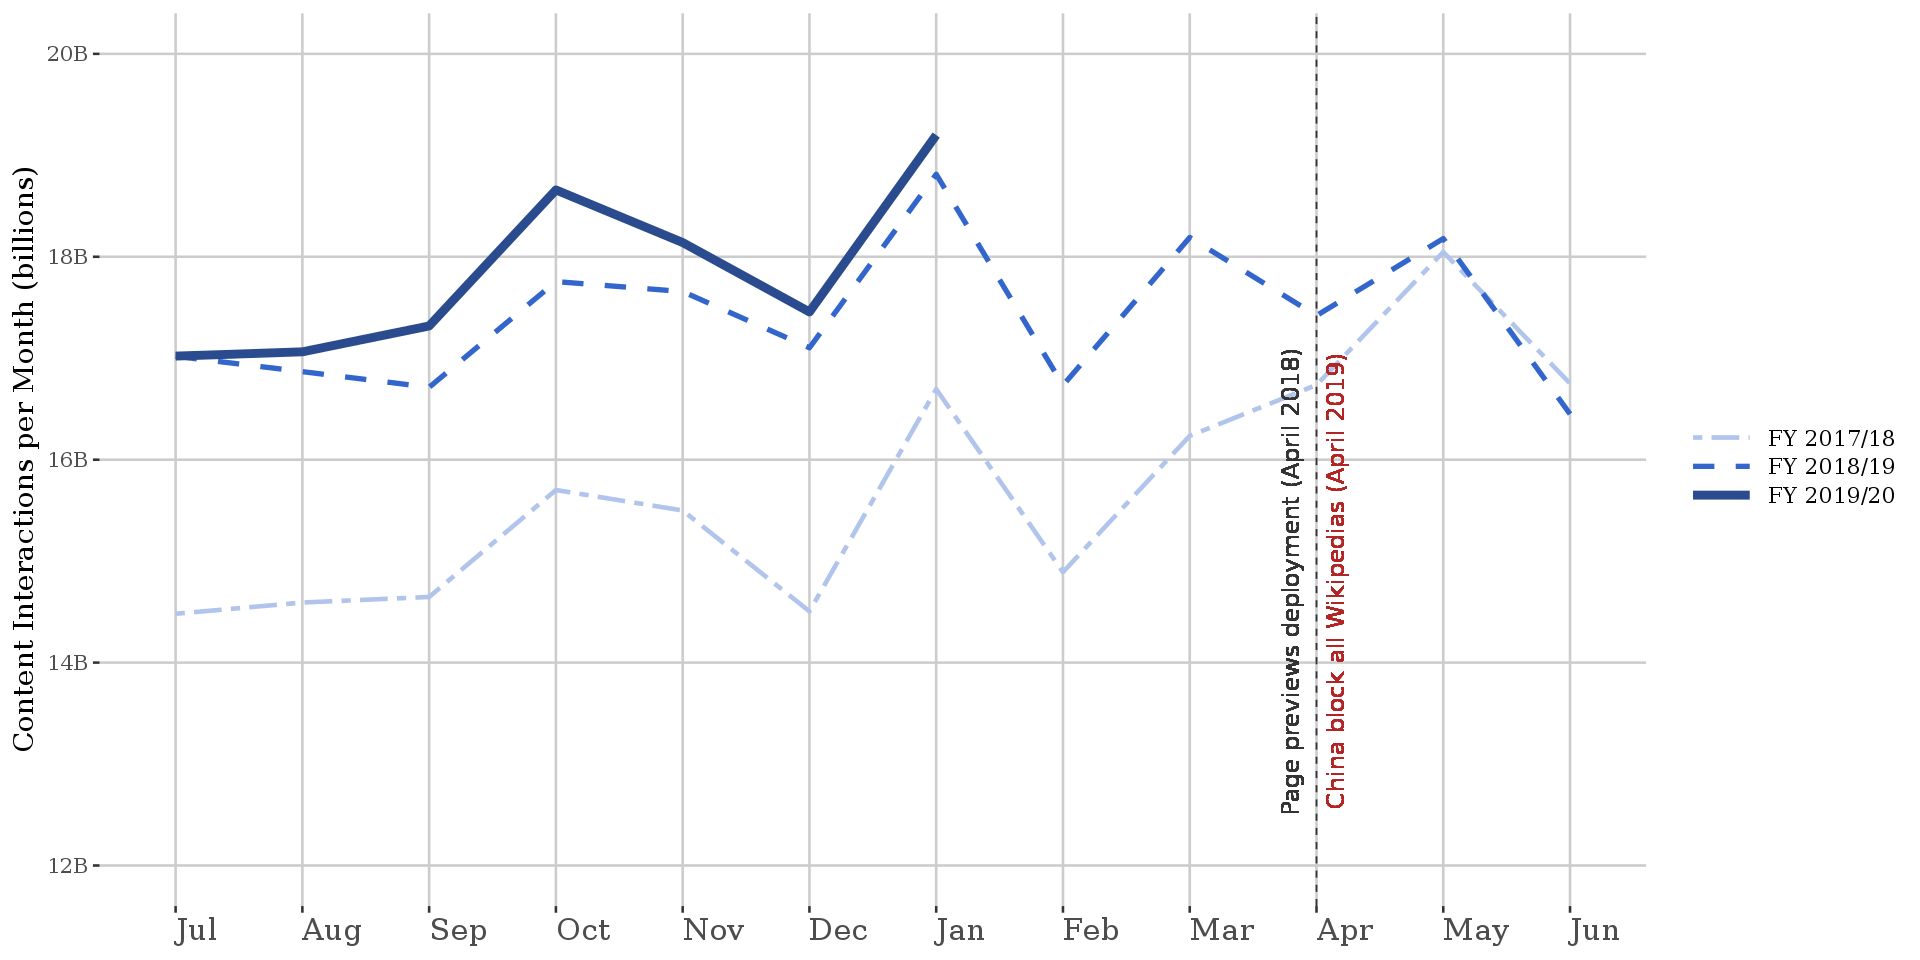

In [9]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- pageview_fy %>%
    ggplot(aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = interactions, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +
    #geom_point(x=01, y=15377558086 , size = 4, color = '#2a4b8d') +
    #geom_text(aes(x =01, y=15600000000, label="July 2019"),hjust=0, vjust=0, size= 5) +    
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_size_manual(values = c(1.3,1.5,2.5)) +
    scale_color_manual(values = c("FY 2017/18"= "#b1c4eb", "FY 2018/19" = "#3366cc","FY 2019/20" = "#2a4b8d")) +
    geom_vline(xintercept = 10, linetype = "dashed", color = "gray20") +
    geom_text(aes(x=10, y=14.8E9, label="Page previews deployment (April 2018)"), size=5, vjust = -1, angle = 90, color = "gray20") +
    geom_text(aes(x=10, y=14.8E9, label="China block all Wikipedias (April 2019)"), size=5, vjust = 1.5, angle = 90, color = "#b32424") +
    scale_x_discrete("Month",
                      breaks = pageview_fy$MonthN, 
                     labels = pageview_fy$Month) +
    scale_y_continuous("Content Interactions per Month (billions)",
                       labels = polloi::compress,
                       limits = c(12E9, 20E9)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),
          axis.text.x =element_text( hjust = 0,size = 18),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 13),
          legend.key.width=unit(1.5,"cm"))
  

#ggsave(filename="Pageviews_monthly_yoy2.png", plot = p, path = 'Figures', units = "in", dpi = 192, height = 6, width = 14, limitsize = FALSE)  
p

### Interactions

In [10]:
view <- 
    pageview %>% 
    select(month,previews_seen,total_pageview,) %>%
    rename(pageviews = "total_pageview") %>%
    rename(previews = "previews_seen") %>%
    gather(type,views, pageviews:previews)
    
interaction <- pageview %>% 
    select(month,total_pageview,previews_seen) %>%
    mutate(previews_seen = replace_na(previews_seen, 0)) %>%
    mutate(interactions = total_pageview+previews_seen)



Warning message:
“Removed 21 rows containing missing values (position_stack).”Warning message:
“Removed 1 rows containing missing values (geom_col).”

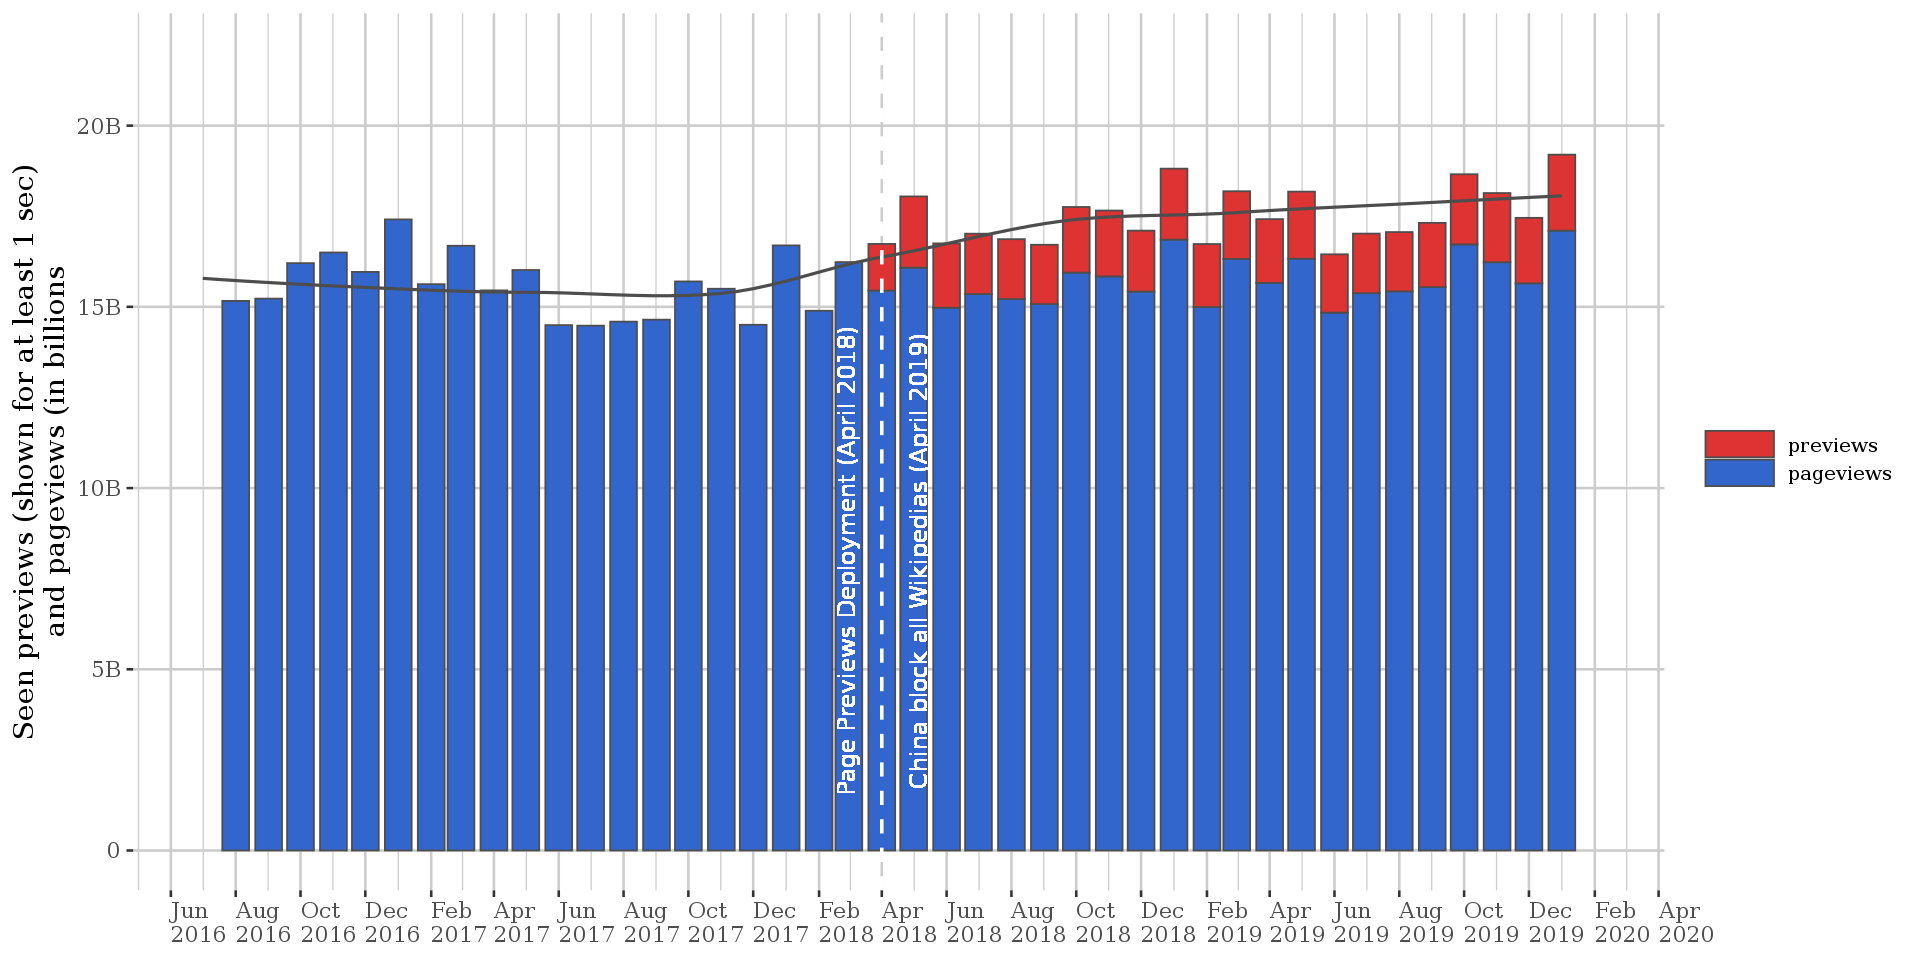

In [12]:
p<- ggplot(data = view, aes(x = month)) + 
    geom_col(data = view, mapping = aes(y = views, fill = factor(type, levels=c("previews","pageviews"))), position= "stack", color ="grey30") +
    geom_smooth(data = interaction,mapping = aes(y=interactions), method = "loess", se = FALSE, size = 0.9,color = 'grey30') +
    scale_fill_manual(values = c("pageviews" = "#3366cc","previews" = "#dd3333")) +
    scale_y_continuous("Seen previews (shown for at least 1 sec)\nand pageviews (in billions",
                       labels = polloi::compress,
                       limits = c(0, 22E9)) +
    scale_x_date("Date", 
                 labels = date_format("%b\n%Y"), 
                 date_breaks = "2 months",
                 limits= as.Date(c("2016-07-01", "2020-02-01"))) +
    geom_vline(xintercept = as.numeric(as.Date("2018-04-01")),
             linetype = "dashed", color = "white",size =1) +
    geom_text(aes(x=as.Date('2018-04-01'), y=8E9, label="Page Previews Deployment (April 2018)"), size=5, vjust = -1.5, angle = 90, color = "white") +
    geom_text(aes(x=as.Date('2018-04-01'), y=8E9, label="China block all Wikipedias (April 2019)"), size=5, vjust = 2.5, angle = 90, color = "white") +
   # labs(title = "Pageviews and seen previews per calendar month") +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif")+
    theme(axis.title.x=element_blank(),
          axis.text=element_text( hjust = 0,size = 13,family="serif"),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=17,hjust = 0.5,vjust = -12),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0,size = 12),
          legend.key.width=unit(1.5,"cm"))

#ggsave(filename="Pageviews and interactions_StackedBar.png", plot = p, path = 'Figures', units = "in", dpi = 192, height = 6, width = 14, limitsize = FALSE)  
p

## Unique Devices

In [9]:
#increasing in unique device from HongKong in September

update_pageviews_query <- "
INSERT INTO TABLE mneisler.pageviews_corrected
PARTITION (year, month, day)
SELECT 
  CONCAT(year,'-',LPAD(month,2,'0'),'-',LPAD(day,2,'0')) AS date,
  SUM(IF(access_method = 'mobile app', view_count, null)) AS apps,
  SUM(IF(access_method = 'desktop', view_count, null)) AS desktop,
  SUM(IF(access_method = 'mobile web', view_count, null)) AS mobileweb,
  SUM(view_count) as total,
  year, month, day
FROM wmf.pageview_hourly
  WHERE (year = '{metrics_year}'AND month = '{metrics_month}')
  AND agent_type='user'
  AND NOT (country_code IN ('PK', 'IR', 'AF') -- https://phabricator.wikimedia.org/T157404#3194046
  AND user_agent_map['browser_family'] = 'IE') -- https://phabricator.wikimedia.org/T193578#4300284
  GROUP BY year, month, day"
